In [ ]:
# Librerias necesarias
from CoffeaDelphes import Converter
import numpy as np
import matplotlib.pyplot as plt
from hist import Hist
import mplhep as hep
import pandas as pd
plt.style.use([hep.style.ROOT])

import warnings
warnings.filterwarnings('ignore')

In [ ]:
"ZprimeTobb_M50.root"
"Zprime_bbbar_M50.root"

In [39]:
fname = "/cms/mc/Samples/Lowptbjet/ZprimeTobb_M50.root" # archivo .root de eventos generados con Delphes.
tree = Converter(fname) # Generar el objeto tree
events = {"Jet": ["PT", "Eta", "Phi", "Mass", "BTag"],
          "MissingET": ["MET", "Phi"],
          "Muon": ["PT", "Eta", "Phi", "Charge"],
          "Electron": ["PT", "Eta", "Phi", "Charge"]} # generar un diccionario con los eventos que se desean.
tree.generate(events) # ingresar en
data = tree.df

In [40]:
data.head() # Visualizar los datos obtenidos

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,missinget_met,missinget_phi,muon_pt0,muon_eta0,muon_phi0,muon_charge0,electron_pt0,electron_eta0,electron_phi0,electron_charge0
0,28.607037,26.456499,14.577800,13.426930,-3.547075,-4.303859,0.445437,0.261185,-0.071361,3.129977,...,4.406406,0.215189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26.750574,8.385600,8.080171,7.885460,0.458789,-0.990767,-3.167830,-2.141332,-1.313833,0.554802,...,10.897000,1.625148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.557293,8.021993,7.922599,7.670539,0.843006,-0.653207,-3.598645,1.508739,0.951876,-2.515274,...,6.550847,1.093366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.945627,20.259619,6.974337,6.881525,3.991079,2.795370,-3.019778,-3.472925,0.161231,-3.069429,...,10.893399,3.111197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25.112280,17.448879,15.496541,6.574527,-0.177987,3.735542,2.367231,-2.941470,2.269108,-1.639921,...,9.352647,-1.324892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
len(data)

738

In [42]:
data.columns # Se observa las columnas generadas

Index(['jet_pt0', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0', 'jet_eta1',
       'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2', 'jet_phi3',
       'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3', 'jet_btag0',
       'jet_btag1', 'jet_btag2', 'jet_btag3', 'missinget_met', 'missinget_phi',
       'muon_pt0', 'muon_eta0', 'muon_phi0', 'muon_charge0', 'electron_pt0',
       'electron_eta0', 'electron_phi0', 'electron_charge0'],
      dtype='object')

In [43]:
# formulas para Delta phi, Abs Delta phi y DeltaR
def DeltaPhi(i,row, col1, col2):
    """
    correction on azimuthal angle difference dphi
    """
    dphi = (row[col1] - row[col2])[i]
    if dphi >= np.pi:
        dphi -= 2*np.pi
    if dphi < -np.pi:
        dphi += 2*np.pi
    return dphi

def AbsDeltaPhi(i,rowa, col1a, col2a = 'met_Phi'):
    return np.abs(DeltaPhi(i,rowa, col1a, col2a))

def DeltaR(Deta,Dphi):
    return np.sqrt( Deta**2 + Dphi**2 )

In [44]:
def pt_jet(data,feature,min_range,max_range, bin):
    '''
    Realiza un grafico de cada objeto.
    '''
    
    #fig = plt.figure(figsize=(6,4))
    box_style=dict(boxstyle='square', alpha=0.5)
    text = "n_events: {}".format(data[feature].count())+"\n" \
            +"mean: {}".format(np.round(data[feature].mean(),2))+"\n" \
            +"std: {}".format(np.round(data[feature].std(),2))
    plt.hist(data[feature],bins=bin)
    
    ax = plt.gca()
    p = ax.patches  
    heights = [patch.get_height() for patch in p]
    if feature[:6] == "Delta_": num = 3
    else: num = 1.8
    
    plt.title("Histograma del objeto: {}".format(feature),size=15)
    #plt.xlabel("pT [GeV]",size=10)
    plt.ylabel("Eventos",size=10)
    plt.text(max_range/num,max(heights)/1.3, text,bbox=box_style,size=12)
    plt.xlim(min_range,max_range)

# Graficas de los Pt(j1,j2,j3,j4)

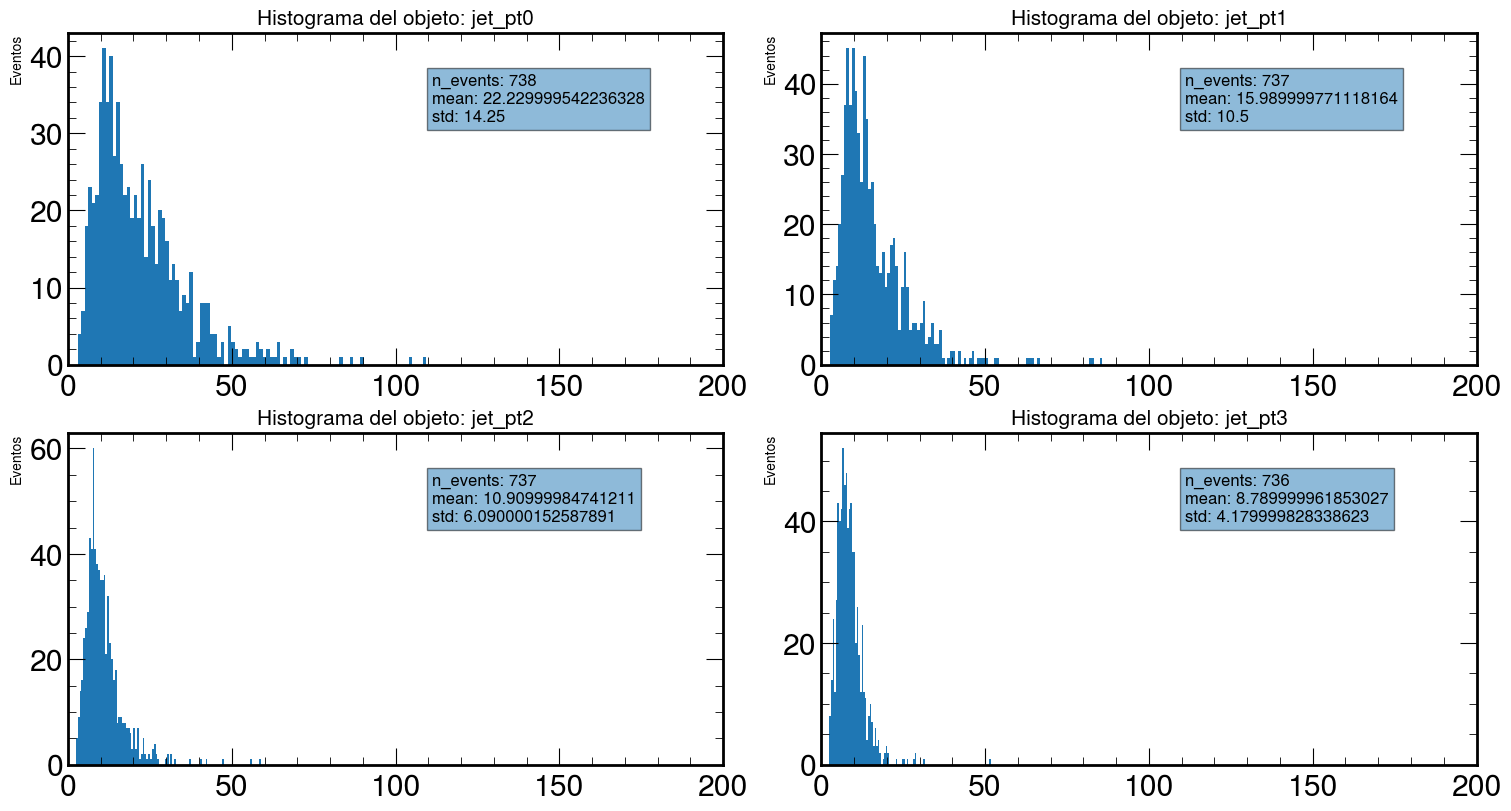

In [45]:
plt.figure(figsize=(15,8),constrained_layout=True)

plt.subplot(2,2,1)
pt_jet(data,"jet_pt0",0,200,100)
plt.subplot(2,2,2)
pt_jet(data,"jet_pt1",0,200,100)
plt.subplot(2,2,3)
pt_jet(data,"jet_pt2",0,200,100)
plt.subplot(2,2,4)
pt_jet(data,"jet_pt3",0,200,100)

# Graficas de los  $\eta$(j1,j2,j3,j4)

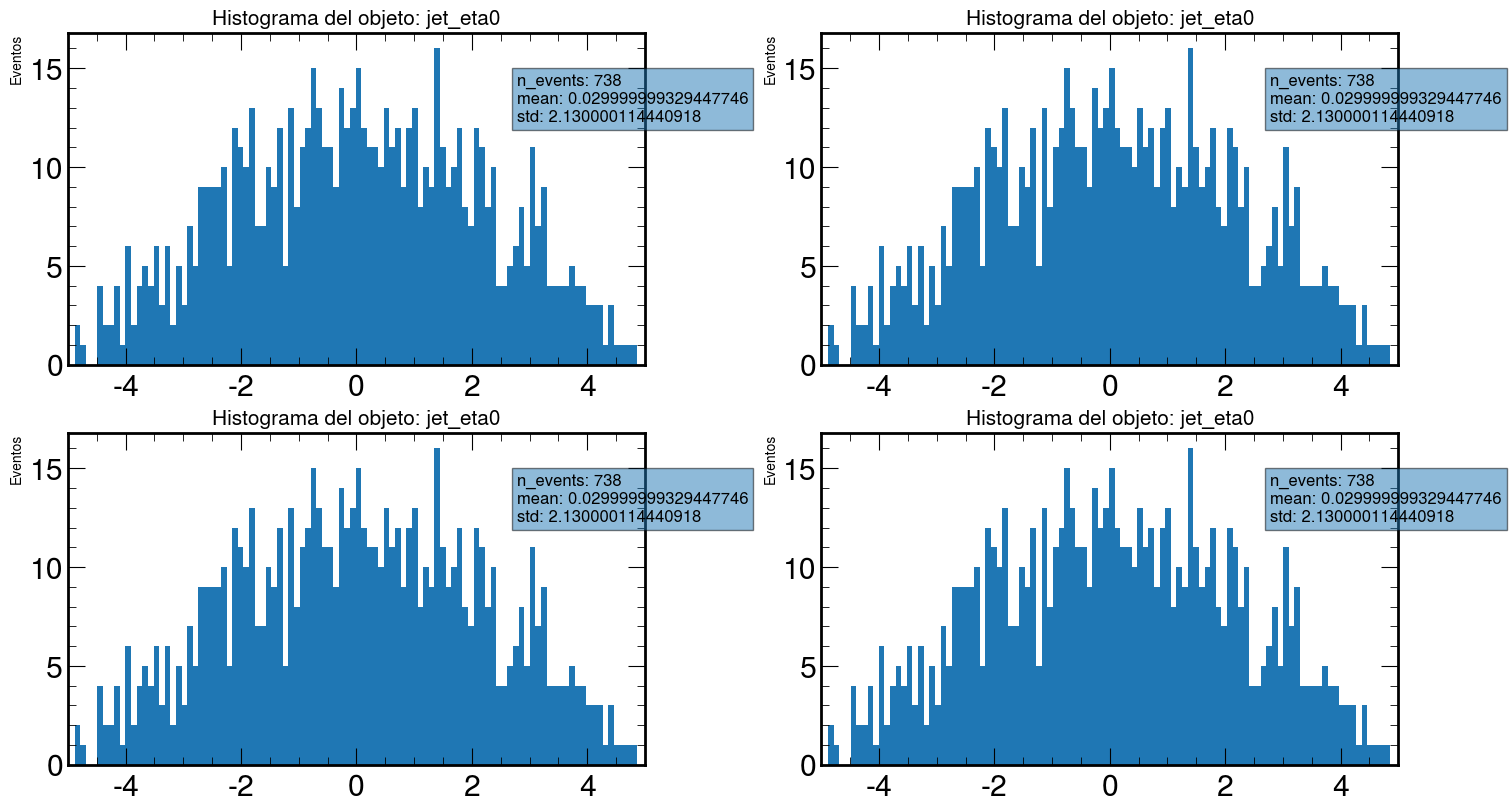

In [46]:
plt.figure(figsize=(15,8),constrained_layout=True)

plt.subplot(2,2,1)
pt_jet(data,'jet_eta0',-5,5,100)
plt.subplot(2,2,2)
pt_jet(data,'jet_eta0',-5,5,100)
plt.subplot(2,2,3)
pt_jet(data,'jet_eta0',-5,5,100)
plt.subplot(2,2,4)
pt_jet(data,'jet_eta0',-5,5,100)

# Graficas de los  $\phi$(j1,j2,j3,j4)

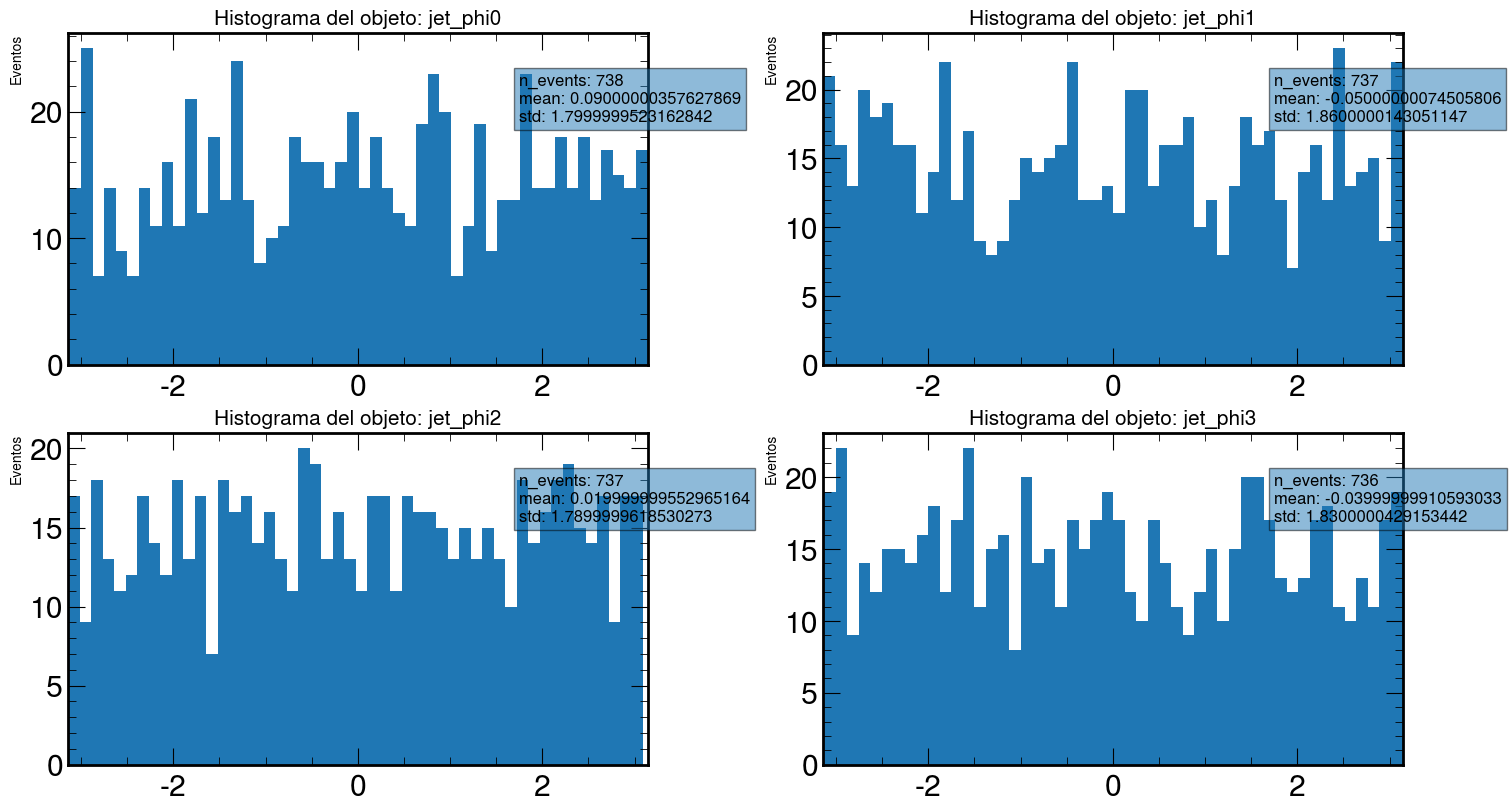

In [48]:
plt.figure(figsize=(15,8),constrained_layout=True)

plt.subplot(2,2,1)
pt_jet(data,'jet_phi0',-np.pi,np.pi,50)
plt.subplot(2,2,2)
pt_jet(data,'jet_phi1',-np.pi,np.pi,50)
plt.subplot(2,2,3)
pt_jet(data,'jet_phi2',-np.pi,np.pi,50)
plt.subplot(2,2,4)
pt_jet(data,'jet_phi3',-np.pi,np.pi,50)

# Análisis para los bjets b1, b2

In [49]:
f = data[["jet_btag0","jet_btag1","jet_btag2","jet_btag3"]]
f_list = [ sum(f.loc[i]) for i in range(len(f)) ]
data.insert(1,"n_jets",f_list)

In [50]:
data_filtered = data[data["n_jets"] == 2]
print("Numero de eventos con 2 jets:",len(data_filtered))
data2 = data_filtered[["jet_btag0","jet_btag1","jet_btag2","jet_btag3","jet_pt0","jet_pt1","jet_pt2","jet_pt3","jet_phi0","jet_phi1","jet_phi2","jet_phi3"]]
data2.head()

Numero de eventos con 2 jets: 80


,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_phi0,jet_phi1,jet_phi2,jet_phi3
4,1.0,0.0,1.0,0.0,25.112280,17.448879,15.496541,6.574527,2.269108,-1.639921,0.231366,0.429492
10,1.0,1.0,0.0,0.0,30.699211,23.774765,7.974298,7.293472,-0.178790,2.851107,0.001378,-0.681370
30,0.0,1.0,1.0,0.0,6.912891,4.886648,4.015412,3.482667,-0.767068,-1.589399,2.194216,0.051522
36,1.0,1.0,0.0,0.0,30.005571,20.485077,14.389222,14.333403,-2.261893,1.720905,-0.450983,-0.367692
43,1.0,0.0,1.0,0.0,45.029491,31.704742,26.485506,12.772601,1.986607,-2.288341,-0.242913,0.459493


In [51]:
tag_pt = []
tag_eta = []
tag_phi = []
tag_mass = []
for i in range(data2.shape[0]):
    pt = []
    eta = []
    phi = []
    mass = []
    if data2.iloc[i][0] == 1.0: 
        pt.append(data_filtered.jet_pt0.to_list()[i])
        eta.append(data_filtered.jet_eta0.to_list()[i])
        phi.append(data_filtered.jet_phi0.to_list()[i])
        mass.append(data_filtered.jet_mass0.to_list()[i])
    if data2.iloc[i][1] == 1.0: 
        pt.append(data_filtered.jet_pt1.to_list()[i])
        eta.append(data_filtered.jet_eta1.to_list()[i])
        phi.append(data_filtered.jet_phi1.to_list()[i])
        mass.append(data_filtered.jet_mass1.to_list()[i])
    if data2.iloc[i][2] == 1.0: 
        pt.append(data_filtered.jet_pt2.to_list()[i])
        eta.append(data_filtered.jet_eta2.to_list()[i])
        phi.append(data_filtered.jet_phi2.to_list()[i])
        mass.append(data_filtered.jet_mass2.to_list()[i])
    if data2.iloc[i][3] == 1.0: 
        pt.append(data_filtered.jet_pt3.to_list()[i])
        eta.append(data_filtered.jet_eta3.to_list()[i])
        phi.append(data_filtered.jet_phi3.to_list()[i])
        mass.append(data_filtered.jet_mass3.to_list()[i])
    tag_pt.append(pt)
    tag_eta.append(eta)
    tag_phi.append(phi)
    tag_mass.append(mass)

try:
    jet_pt_b1 = [j[0] for j in tag_pt]
    jet_pt_b2 = [j[1] for j in tag_pt]
    jet_eta_b1 = [j[0] for j in tag_eta]
    jet_eta_b2 = [j[1] for j in tag_eta]
    jet_phi_b1 = [j[0] for j in tag_phi]
    jet_phi_b2 = [j[1] for j in tag_phi]
    jet_mass_b1 = [j[0] for j in tag_mass]
    jet_mass_b2 = [j[1] for j in tag_mass]
except:
    pass


di = {"jet_pt_b1":jet_pt_b1,"jet_pt_b2":jet_pt_b2,
      "jet_eta_b1":jet_eta_b1,"jet_eta_b2":jet_eta_b2,
      "jet_phi_b1":jet_phi_b1,"jet_phi_b2":jet_phi_b2,
      "jet_mass_b1":jet_mass_b1,"jet_mass_b2":jet_mass_b2}

data_bjet = pd.DataFrame(di)
data_bjet.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2
0,25.112280,15.496541,-0.177987,2.367231,2.269108,0.231366,3.249918,2.949272
1,30.699211,23.774765,0.557608,0.257070,-0.178790,2.851107,4.243237,1.787659
2,4.886648,4.015412,-2.115624,1.858073,-1.589399,2.194216,0.635177,0.795784
3,30.005571,20.485077,0.928941,0.918558,-2.261893,1.720905,3.933682,3.084310
4,45.029491,26.485506,1.751383,1.739453,1.986607,-0.242913,4.652555,3.687050


In [53]:
phi_cor = []
for i in range(len(data_bjet)):
    phi_cor.append(AbsDeltaPhi(i,data_bjet,"jet_phi_b1","jet_phi_b2"))

data_bjet['Delta_eta_b'] = data_bjet.jet_eta_b2 - data_bjet.jet_eta_b1
data_bjet['Delta_phi_b'] = phi_cor
data_bjet["DeltaR_b"] = DeltaR(data_bjet.Delta_eta_b,data_bjet.Delta_phi_b)
data_bjet.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,DeltaR_b
0,25.112280,15.496541,-0.177987,2.367231,2.269108,0.231366,3.249918,2.949272,2.545218,2.037742,3.260449
1,30.699211,23.774765,0.557608,0.257070,-0.178790,2.851107,4.243237,1.787659,-0.300538,3.029896,3.044765
2,4.886648,4.015412,-2.115624,1.858073,-1.589399,2.194216,0.635177,0.795784,3.973697,2.499571,4.694478
3,30.005571,20.485077,0.928941,0.918558,-2.261893,1.720905,3.933682,3.084310,-0.010383,2.300388,2.300411
4,45.029491,26.485506,1.751383,1.739453,1.986607,-0.242913,4.652555,3.687050,-0.011930,2.229519,2.229551


# Graficas de los $P_{T}$(b1,b2)

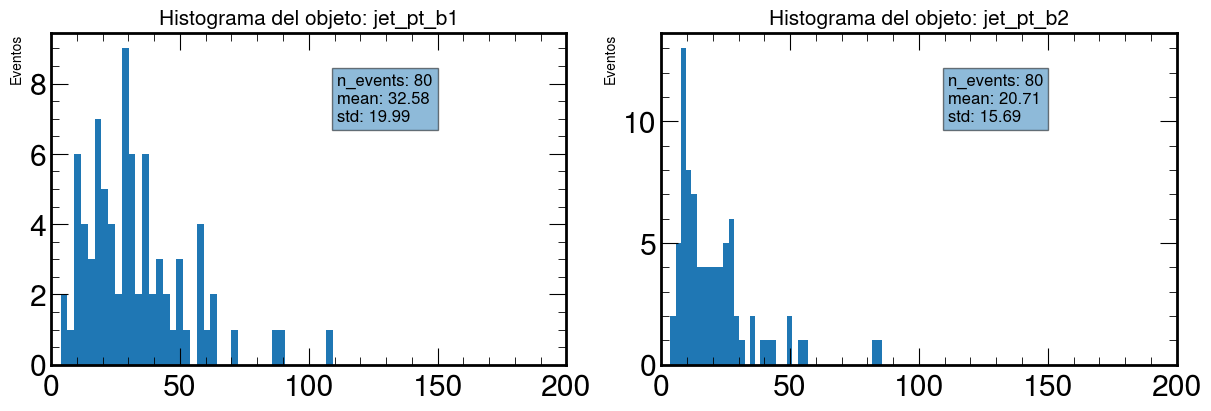

In [60]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,"jet_pt_b1",0,200,40)
plt.subplot(1,2,2)
pt_jet(data_bjet,"jet_pt_b2",0,200,40)

# Graficas de los $\eta$(b1), $\eta$(b2)

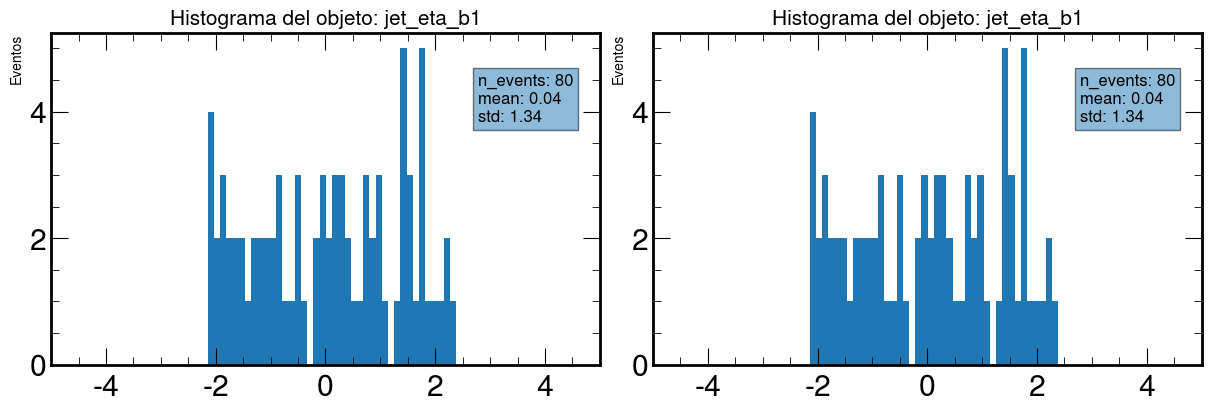

In [61]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'jet_eta_b1',-5,5,40)
plt.subplot(1,2,2)
pt_jet(data_bjet,'jet_eta_b1',-5,5,40)

# Graficas de los $\phi$(b1), $\phi$(b2)

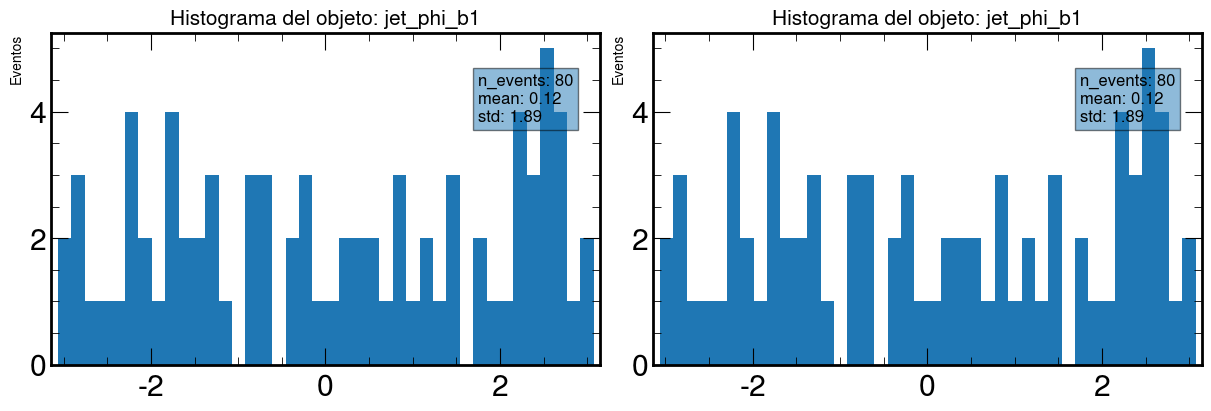

In [62]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'jet_phi_b1',-np.pi,np.pi,40)
plt.subplot(1,2,2)
pt_jet(data_bjet,'jet_phi_b1',-np.pi,np.pi,40)

# Graficas de los $\Delta \phi$, $\Delta \eta$  y $\Delta R$

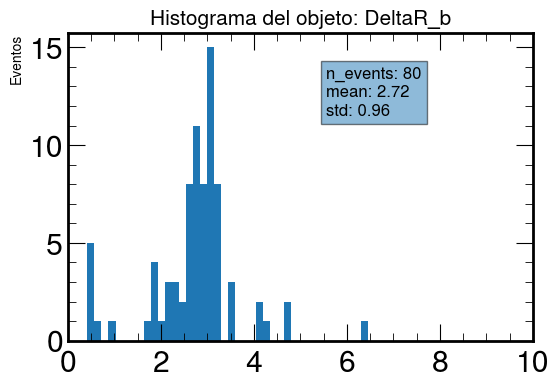

In [68]:
plt.figure(figsize=(6,4))
pt_jet(data_bjet,"DeltaR_b",0,10,40)

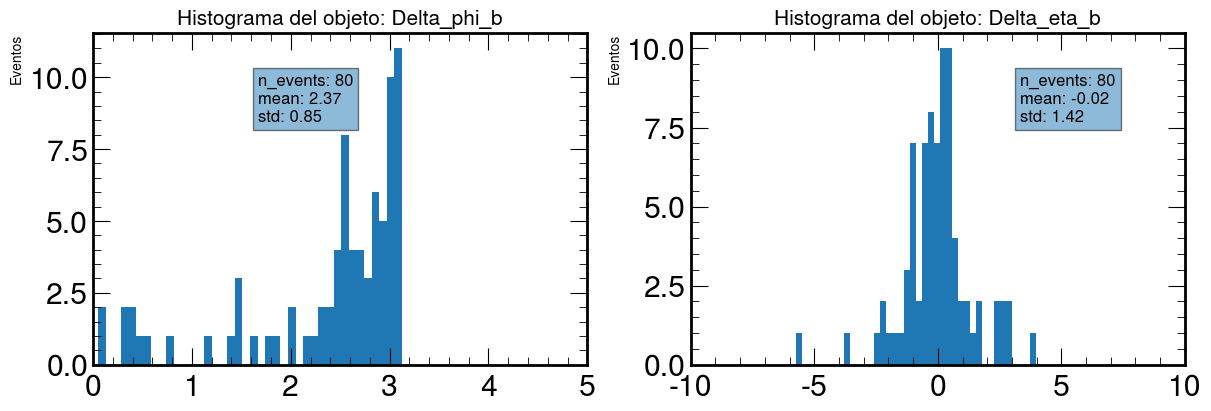

In [69]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'Delta_phi_b',0,5,40)
plt.subplot(1,2,2)
pt_jet(data_bjet,'Delta_eta_b',-10,10,40)

# Masa invariante en Colisionadores de particulas:

In [70]:
def y(m,eta,pt):
    return np.log( (np.sqrt(m**2 + (pt**2)*(np.cosh(eta)**2)) + pt*np.sinh(eta)) / (np.sqrt(m**2 + pt**2)) )

y1 = y(data_bjet.jet_mass_b1,data_bjet.jet_eta_b1,data_bjet.jet_pt_b1)
y2 = y(data_bjet.jet_mass_b2,data_bjet.jet_eta_b2,data_bjet.jet_pt_b2)

data_bjet['y1'] = y1
data_bjet['y2'] = y2

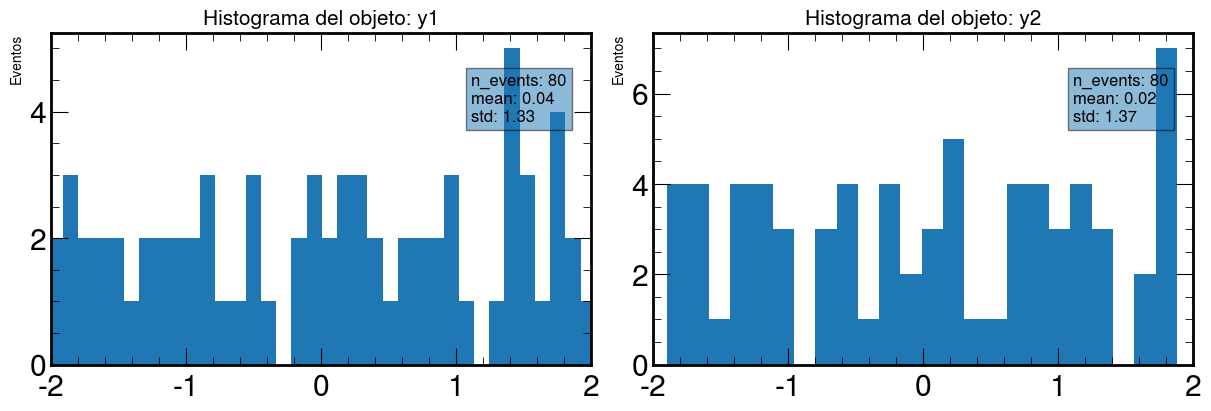

In [71]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'y1',-2,2,40)
plt.subplot(1,2,2)
pt_jet(data_bjet,'y2',-2,2,40)

In [72]:
def inv_mass(pt1,pt2,y1,y2,Dphi):
    return np.sqrt(2*pt1*pt2*(np.cosh(y1 - y2) - np.cos(Dphi)))

inv_m = inv_mass(data_bjet.jet_pt_b1,data_bjet.jet_pt_b2,
                 data_bjet.y1,data_bjet.y2,
                 data_bjet.Delta_phi_b)

data_bjet["inv_mass_b"] = inv_m # agregamos al dataset la masa invariante.

def inv_mass(pt1,pt2,Deta,Dphi):
    return np.sqrt(2*pt1*pt2*(np.cosh(Deta) - np.cos(Dphi)))

inv_m = inv_mass(data_bjet.jet_pt_b1,data_bjet.jet_pt_b2,
                 data_bjet.Delta_eta_b,
                 data_bjet.Delta_phi_b)

data_bjet["inv_mass_b_eta"] = inv_m # agregamos al dataset la masa invariante.

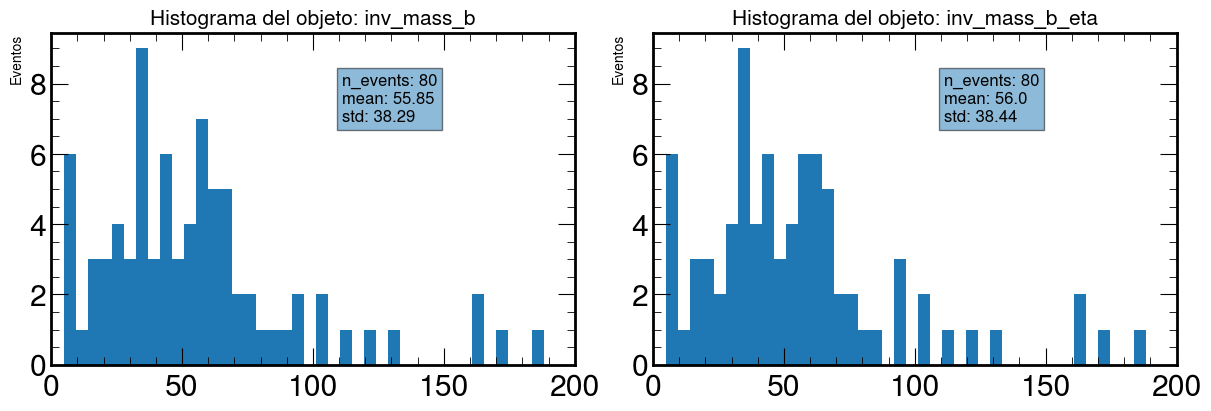

In [73]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,"inv_mass_b",0,200,40)
plt.subplot(1,2,2)
pt_jet(data_bjet,"inv_mass_b_eta",0,200,40)

# MET

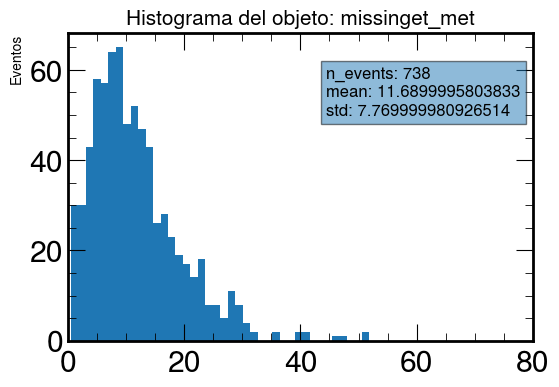

In [74]:
plt.figure(figsize=(6,4))
pt_jet(data,'missinget_met',0,80,40)

In [75]:
data_bjet.to_csv("data_bjet_M50.csv",index=None)

# Eficiencia de corte

In [76]:
data_bjet = pd.read_csv("data_bjet_M50.csv")
data_before_c1 = data_bjet

In [77]:
b0 = []
b1 = []
j0 = []
j1 = []
for i in range(len(data2)):
    b0_temp = data_before_c1.iloc[i][4]
    b1_temp = data_before_c1.iloc[i][5]
    j0_temp = data2.iloc[i][9]
    j1_temp = data2.iloc[i][10]
    
    b0.append(b0_temp)
    b1.append(b1_temp)
    j0.append(j0_temp)
    j1.append(j1_temp)

In [78]:
def eff_corte(before,after):
    return len(after)/len(before)

def pross(n_pros,b0,b1,j0,j1):
    pross = []
    if n_pros == 1:
        for i in range(len(data2)):
            if b0[i] != j0[i]:
                pross.append([b0[i],j0[i]]) # b0_j0
            else: pross.append(0)
    if n_pros == 2:
        for i in range(len(data2)):
            if b1[i] != j0[i]:
                pross.append([b1[i],j0[i]]) # b1_j0
            else: pross.append(0)
    if n_pros == 3:
        for i in range(len(data2)):
            if b0[i] != j1[i]:
                pross.append([b0[i],j1[i]]) # b0_j1
            else: pross.append(0)
    if n_pros == 4:
        for i in range(len(data2)):
            if b1[i] != j1[i]:
                pross.append([b1[i],j1[i]])
            else: pross.append(0)
    return pross

In [79]:
pross1 = pross(1,b0,b1,j0,j1)
pross2 = pross(2,b0,b1,j0,j1)
pross3 = pross(3,b0,b1,j0,j1)
pross4 = pross(4,b0,b1,j0,j1)

In [80]:
data_before_c1 = data_bjet
data_before_c1["pross1"] = pross1
data_before_c1["pross2"] = pross2
data_before_c1["pross3"] = pross3
data_before_c1["pross4"] = pross4
data_before_c1["met"] = data_filtered.missinget_phi.tolist()

data_before_c1["jet_phi0"] = data2.jet_phi0.tolist()
data_before_c1["jet_phi1"] = data2.jet_phi1.tolist()
data_before_c1["jet_phi2"] = data2.jet_phi2.tolist()
data_before_c1["jet_phi3"] = data2.jet_phi3.tolist()
data_before_c1.head()


,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,...,inv_mass_b_eta,pross1,pross2,pross3,pross4,met,jet_phi0,jet_phi1,jet_phi2,jet_phi3
0,25.112280,15.496541,-0.177987,2.367231,2.269108,0.231366,3.249918,2.949272,2.545218,2.037742,...,73.082465,"[2.269107818603516, -1.639920711517334]","[0.2313657999038696, -1.639920711517334]","[2.269107818603516, 0.23136579990386963]","[0.2313657999038696, 0.23136579990386963]",-1.324892,2.269108,-1.639921,0.231366,0.429492
1,30.699211,23.774765,0.557608,0.257070,-0.178790,2.851107,4.243237,1.787659,-0.300538,3.029896,...,54.559977,"[-0.1787895262241363, 2.851106882095337]",0,"[-0.1787895262241363, 0.0013782974565401673]","[2.851106882095337, 0.0013782974565401673]",2.858102,-0.178790,2.851107,0.001378,-0.681370
2,4.886648,4.015412,-2.115624,1.858073,-1.589399,2.194216,0.635177,0.795784,3.973697,2.499571,...,32.791871,0,"[2.1942155361175537, -1.589398980140686]","[-1.589398980140686, 2.1942155361175537]",0,2.433873,-0.767068,-1.589399,2.194216,0.051522
3,30.005571,20.485077,0.928941,0.918558,-2.261893,1.720905,3.933682,3.084310,-0.010383,2.300388,...,45.263999,"[-2.261892557144165, 1.7209049463272095]","[1.7209049463272097, 1.7209049463272095]","[-2.261892557144165, -0.45098334550857544]","[1.7209049463272097, -0.45098334550857544]",0.204248,-2.261893,1.720905,-0.450983,-0.367692
4,45.029491,26.485506,1.751383,1.739453,1.986607,-0.242913,4.652555,3.687050,-0.011930,2.229519,...,62.011789,"[1.9866069555282595, -2.2883405685424805]","[-0.2429125010967254, -2.2883405685424805]","[1.9866069555282595, -0.24291250109672546]","[-0.2429125010967254, -0.24291250109672546]",1.278878,1.986607,-2.288341,-0.242913,0.459493


## Primer corte: $N_{b} = 2$, $P_{T}(b)>5$, $|\eta(b)| < 2.5$
los $N_{b} = 2$ son los eventos que se consideraron con 2 jets, estos se realizo en el anterior análisis. 

In [81]:
data_after_c1 = data_bjet[(data_bjet.jet_pt_b1 > 5) & (data_bjet.jet_pt_b2 > 5) & (abs(data_bjet.jet_eta_b1) < 2.5) & (abs(data_bjet.jet_eta_b2) < 2.5)]
data_after_c1.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,...,inv_mass_b_eta,pross1,pross2,pross3,pross4,met,jet_phi0,jet_phi1,jet_phi2,jet_phi3
0,25.112280,15.496541,-0.177987,2.367231,2.269108,0.231366,3.249918,2.949272,2.545218,2.037742,...,73.082465,"[2.269107818603516, -1.639920711517334]","[0.2313657999038696, -1.639920711517334]","[2.269107818603516, 0.23136579990386963]","[0.2313657999038696, 0.23136579990386963]",-1.324892,2.269108,-1.639921,0.231366,0.429492
1,30.699211,23.774765,0.557608,0.257070,-0.178790,2.851107,4.243237,1.787659,-0.300538,3.029896,...,54.559977,"[-0.1787895262241363, 2.851106882095337]",0,"[-0.1787895262241363, 0.0013782974565401673]","[2.851106882095337, 0.0013782974565401673]",2.858102,-0.178790,2.851107,0.001378,-0.681370
3,30.005571,20.485077,0.928941,0.918558,-2.261893,1.720905,3.933682,3.084310,-0.010383,2.300388,...,45.263999,"[-2.261892557144165, 1.7209049463272095]","[1.7209049463272097, 1.7209049463272095]","[-2.261892557144165, -0.45098334550857544]","[1.7209049463272097, -0.45098334550857544]",0.204248,-2.261893,1.720905,-0.450983,-0.367692
4,45.029491,26.485506,1.751383,1.739453,1.986607,-0.242913,4.652555,3.687050,-0.011930,2.229519,...,62.011789,"[1.9866069555282595, -2.2883405685424805]","[-0.2429125010967254, -2.2883405685424805]","[1.9866069555282595, -0.24291250109672546]","[-0.2429125010967254, -0.24291250109672546]",1.278878,1.986607,-2.288341,-0.242913,0.459493
5,58.032269,53.945400,-2.041065,-1.562408,-1.186257,1.654750,9.342965,4.176747,0.478656,2.841006,...,113.897388,"[-1.186256766319275, 1.6547495126724243]",0,"[-1.186256766319275, 1.8483844995498657]","[1.6547495126724243, 1.8483844995498657]",1.379245,-1.186257,1.654750,1.848384,-2.127475


In [82]:
print("La eficiencia para el primer corte es:", eff_corte(data_before_c1,data_after_c1))

La eficiencia para el primer corte es: 0.975


## Segundo corte: $\Delta R(b_{1},b_{2}) < 3.5$

In [83]:
data_before_c2 = data_after_c1

In [84]:
data_after_c2 = data_before_c2[(data_before_c2.DeltaR_b < 3.5)]
data_after_c2.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,...,inv_mass_b_eta,pross1,pross2,pross3,pross4,met,jet_phi0,jet_phi1,jet_phi2,jet_phi3
0,25.112280,15.496541,-0.177987,2.367231,2.269108,0.231366,3.249918,2.949272,2.545218,2.037742,...,73.082465,"[2.269107818603516, -1.639920711517334]","[0.2313657999038696, -1.639920711517334]","[2.269107818603516, 0.23136579990386963]","[0.2313657999038696, 0.23136579990386963]",-1.324892,2.269108,-1.639921,0.231366,0.429492
1,30.699211,23.774765,0.557608,0.257070,-0.178790,2.851107,4.243237,1.787659,-0.300538,3.029896,...,54.559977,"[-0.1787895262241363, 2.851106882095337]",0,"[-0.1787895262241363, 0.0013782974565401673]","[2.851106882095337, 0.0013782974565401673]",2.858102,-0.178790,2.851107,0.001378,-0.681370
3,30.005571,20.485077,0.928941,0.918558,-2.261893,1.720905,3.933682,3.084310,-0.010383,2.300388,...,45.263999,"[-2.261892557144165, 1.7209049463272095]","[1.7209049463272097, 1.7209049463272095]","[-2.261892557144165, -0.45098334550857544]","[1.7209049463272097, -0.45098334550857544]",0.204248,-2.261893,1.720905,-0.450983,-0.367692
4,45.029491,26.485506,1.751383,1.739453,1.986607,-0.242913,4.652555,3.687050,-0.011930,2.229519,...,62.011789,"[1.9866069555282595, -2.2883405685424805]","[-0.2429125010967254, -2.2883405685424805]","[1.9866069555282595, -0.24291250109672546]","[-0.2429125010967254, -0.24291250109672546]",1.278878,1.986607,-2.288341,-0.242913,0.459493
5,58.032269,53.945400,-2.041065,-1.562408,-1.186257,1.654750,9.342965,4.176747,0.478656,2.841006,...,113.897388,"[-1.186256766319275, 1.6547495126724243]",0,"[-1.186256766319275, 1.8483844995498657]","[1.6547495126724243, 1.8483844995498657]",1.379245,-1.186257,1.654750,1.848384,-2.127475


In [85]:
print("La eficiencia para el segundo corte es:", eff_corte(data_before_c2,data_after_c2))

La eficiencia para el segundo corte es: 0.9230769230769231


## Tercer corte: $m_{b1,b2} < 50$

In [86]:
data_before_c3 = data_after_c2

In [87]:
data_after_c3 = data_before_c3[(data_before_c3.inv_mass_b < 50) & (data_before_c3.inv_mass_b_eta < 50)].reset_index()
data_after_c3.drop("index",axis=1,inplace=True)
data_after_c3.head(10)

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,...,inv_mass_b_eta,pross1,pross2,pross3,pross4,met,jet_phi0,jet_phi1,jet_phi2,jet_phi3
0,30.005571,20.485077,0.928941,0.918558,-2.261893,1.720905,3.933682,3.084310e+00,-0.010383,2.300388,...,45.263999,"[-2.261892557144165, 1.7209049463272095]","[1.7209049463272097, 1.7209049463272095]","[-2.261892557144165, -0.45098334550857544]","[1.7209049463272097, -0.45098334550857544]",0.204248,-2.261893,1.720905,-0.450983,-0.367692
1,17.729637,7.257498,-0.925203,0.432409,-1.539267,2.939303,2.795684,1.385283e+00,1.357612,1.804615,...,24.348884,"[-1.53926682472229, 2.079927444458008]","[2.939303159713745, 2.079927444458008]","[-1.53926682472229, -3.1343131065368652]","[2.939303159713745, -3.1343131065368652]",0.045102,-1.539267,2.079927,-3.134313,2.939303
2,30.244276,9.458129,-1.200021,-0.133959,-1.863235,1.541678,4.370663,1.774305e+00,1.066062,2.878272,...,38.491217,"[-1.8632349967956543, 2.2758896350860596]","[1.5416780710220337, 2.2758896350860596]","[-1.8632349967956543, 3.0886356830596924]","[1.5416780710220337, 3.0886356830596924]",0.896093,-1.863235,2.275890,3.088636,1.541678
3,28.323366,11.020461,1.445357,1.898158,-1.698247,0.956594,5.804322,2.328938e+00,0.452801,2.654840,...,35.229801,"[-1.6982468366622925, 0.9565936326980591]","[0.9565936326980592, 0.9565936326980591]","[-1.6982468366622925, 1.3129392862319946]","[0.9565936326980592, 1.3129392862319946]",2.306913,-1.698247,0.956594,1.312939,1.343367
4,7.196779,6.347936,1.466929,0.993870,-1.720205,-2.494814,1.145968,1.685874e-07,-0.473060,0.774609,...,6.040186,"[-1.7202054262161257, -1.7202054262161255]","[-2.494814395904541, -1.7202054262161255]","[-1.7202054262161257, 0.5562916398048401]","[-2.494814395904541, 0.5562916398048401]",-0.011544,-3.049189,-1.720205,0.556292,-2.494814
5,18.009363,15.676431,1.783095,1.228057,0.312239,3.047631,4.394296,2.826074e+00,-0.555039,2.735393,...,34.242878,"[0.3122385144233703, 3.047631025314331]",0,"[0.3122385144233703, -2.6983602046966553]","[3.047631025314331, -2.6983602046966553]",-1.274295,0.312239,3.047631,-2.698360,2.750503
6,43.220921,8.458193,1.811911,1.269015,2.632398,-0.895110,5.765030,1.121092e+00,-0.542896,2.755677,...,38.973463,"[2.6323978900909424, -0.1607140451669693]","[-0.8951099514961243, -0.1607140451669693]","[2.6323978900909424, -0.8951099514961243]",0,-0.489591,2.632398,-0.160714,-0.895110,-2.236200
7,14.793609,12.636751,0.776795,2.348083,-2.026142,1.459594,1.227164,1.986938e+00,1.571288,2.797449,...,35.924001,"[-2.026141881942749, 1.4595940113067627]",0,"[-2.026141881942749, 2.0523362159729004]","[1.4595940113067627, 2.0523362159729004]",-1.558746,-2.026142,1.459594,2.052336,1.605259
8,30.038277,16.320850,0.027543,-0.190573,0.593749,-2.268495,7.044538,2.957465e+00,-0.218117,2.862243,...,44.118114,"[0.5937486290931702, -2.2684946060180664]",0,"[0.5937486290931702, -0.044700056314468384]","[-2.2684946060180664, -0.044700056314468384]",2.692556,0.593749,-2.268495,-0.044700,-2.481261
9,19.093166,17.276066,2.164505,0.030144,-2.875032,2.985868,3.751832,3.834802e+00,-2.134361,0.422285,...,47.170815,"[-2.8750319480896, 1.1246893405914307]","[2.985868215560913, 1.1246893405914307]","[-2.8750319480896, -2.8750319480895996]","[2.985868215560913, -2.8750319480895996]",-2.202690,0.064946,1.124689,-2.875032,2.985868


In [88]:
print("La eficiencia para el tercer corte es:", eff_corte(data_before_c3,data_after_c3))

La eficiencia para el tercer corte es: 0.5416666666666666


# Cut Analysis

1. $| \Delta \phi(j0,j1)|$

2. $| \Delta \phi(j0,j2)|$

3. $| \Delta \phi(j0,j3)|$

4. $| \Delta \phi(j1,j2)|$

5. $| \Delta \phi(j1,j3)|$

6. $| \Delta \phi(j2,j3)|$

7. $| \Delta \phi(b0,b1)|$

8. $| \Delta \phi(b0,j0)|$ con b0 y j0 no siendo el mismo jet

9. $| \Delta \phi(b0,j1)|$ con b0 y j1 no siendo el mismo jet

10. $| \Delta \phi(b1,j0)|$ con b1 y j0 no siendo el mismo jet

11. $| \Delta \phi(b1,j1)|$ con b1 y j1 no siendo el mismo jet

In [89]:
dic_Dphi = {"j0_j1":[],"j0_j2":[],"j0_j3":[],"j1_j2":[],"j1_j3":[],"j2_j3":[],"b0_b1":[],"b0_j0":[],"b0_j1":[],"b1_j0":[],"b1_j1":[]}
df_Dphi = pd.DataFrame(dic_Dphi)
df_Dphi.head()

,j0_j1,j0_j2,j0_j3,j1_j2,j1_j3,j2_j3,b0_b1,b0_j0,b0_j1,b1_j0,b1_j1


In [90]:
phi_cor_1 = []
for i in range(len(data_after_c3)):
    phi_cor_1.append(AbsDeltaPhi(i,data_after_c3,"jet_phi0","jet_phi1")) # j0_j1

phi_cor_2 = []
for i in range(len(data_after_c3)):
    phi_cor_2.append(AbsDeltaPhi(i,data_after_c3,"jet_phi0","jet_phi2")) # j0_j2
    
phi_cor_3 = []
for i in range(len(data_after_c3)):
    phi_cor_3.append(AbsDeltaPhi(i,data_after_c3,"jet_phi0","jet_phi3")) # j0_j3

phi_cor_4 = []
for i in range(len(data_after_c3)):
    phi_cor_4.append(AbsDeltaPhi(i,data_after_c3,"jet_phi1","jet_phi2")) # j1_j2
    
phi_cor_5 = []
for i in range(len(data_after_c3)):
    phi_cor_5.append(AbsDeltaPhi(i,data_after_c3,"jet_phi1","jet_phi3")) # j1_j3
        
phi_cor_6 = []
for i in range(len(data_after_c3)):
    phi_cor_6.append(AbsDeltaPhi(i,data_after_c3,"jet_phi2","jet_phi3")) # j2_j3
    
phi_cor_7 = []
for i in range(len(data_after_c3)):
    phi_cor_7.append(AbsDeltaPhi(i,data_after_c3,"jet_phi_b1","jet_phi_b2")) # b0_b1

In [91]:
def DeltaPhi_2(d1,d2):
    dphi = d1 - d2
    if dphi >= np.pi:
        dphi -= 2*np.pi
    if dphi < -np.pi:
        dphi += 2*np.pi
    return dphi

def AbsDeltaPhi_2(d1,d2):
    return np.abs(DeltaPhi_2(d1,d2))    

In [92]:
phi_cor_8 = []
for i in range(len(data_after_c3)):
    if data_after_c3.pross1[i] == 0:
        phi_cor_8.append(np.nan)
    else:
        d_temp = data_after_c3.pross1[i]
        phi_cor_8.append(AbsDeltaPhi_2(d_temp[0],d_temp[1])) # b0_j0
        
phi_cor_9 = []
for i in range(len(data_after_c3)):
    if data_after_c3.pross2[i] == 0:
        phi_cor_9.append(np.nan)
    else:
        d_temp = data_after_c3.pross2[i]
        phi_cor_9.append(AbsDeltaPhi_2(d_temp[0],d_temp[1])) # b1_j0
        
phi_cor_10 = []
for i in range(len(data_after_c3)):
    if data_after_c3.pross3[i] == 0:
        phi_cor_10.append(np.nan)
    else:
        d_temp = data_after_c3.pross3[i]
        phi_cor_10.append(AbsDeltaPhi_2(d_temp[0],d_temp[1])) # b0_j1
        
phi_cor_11 = []
for i in range(len(data_after_c3)):
    if data_after_c3.pross4[i] == 0:
        phi_cor_11.append(np.nan)
    else:
        d_temp = data_after_c3.pross4[i]
        phi_cor_11.append(AbsDeltaPhi_2(d_temp[0],d_temp[1])) # b1_j1
        
phi_cor_12 = []
for i in range(len(data_after_c3)):
    phi_cor_12.append(AbsDeltaPhi(i,data_after_c3,"met","jet_phi0")) # metPhi_j0
    
phi_cor_13 = []
for i in range(len(data_after_c3)):
    phi_cor_13.append(AbsDeltaPhi(i,data_after_c3,"met","jet_phi1")) # metPhi_j1
    
phi_cor_14 = []
for i in range(len(data_after_c3)):
    phi_cor_14.append(AbsDeltaPhi(i,data_after_c3,"met","jet_phi2")) # metPhi_j2
    
phi_cor_15 = []
for i in range(len(data_after_c3)):
    phi_cor_15.append(AbsDeltaPhi(i,data_after_c3,"met","jet_phi3")) # metPhi_j3

In [93]:
df_Dphi["j0_j1"] = phi_cor_1
df_Dphi["j0_j2"] = phi_cor_2
df_Dphi["j0_j3"] = phi_cor_3
df_Dphi["j1_j2"] = phi_cor_4
df_Dphi["j1_j3"] = phi_cor_5
df_Dphi["j2_j3"] = phi_cor_6
df_Dphi["b0_b1"] = phi_cor_7
df_Dphi["b0_j0"] = phi_cor_8
df_Dphi["b0_j1"] = phi_cor_10
df_Dphi["b1_j0"] = phi_cor_9
df_Dphi["b1_j1"] = phi_cor_11
df_Dphi["metphi_j0"] = phi_cor_12
df_Dphi["metphi_j1"] = phi_cor_13
df_Dphi["metphi_j2"] = phi_cor_14
df_Dphi["metphi_j3"] = phi_cor_15

In [94]:
df_Dphi.head()

,j0_j1,j0_j2,j0_j3,j1_j2,j1_j3,j2_j3,b0_b1,b0_j0,b0_j1,b1_j0,b1_j1,metphi_j0,metphi_j1,metphi_j2,metphi_j3
0,2.300388,1.810909,1.894201,2.171888,2.088597,0.083292,2.300388,2.300388e+00,1.810909,2.220446e-16,2.171888,2.466141,1.516657,0.655231,0.571940
1,2.663991,1.595046,1.804615,1.068945,0.859376,0.209569,1.804615,2.663991e+00,1.595046,8.593757e-01,0.209569,1.584369,2.034825,3.103770,2.894201
2,2.144061,1.331315,2.878272,0.812746,0.734212,1.546958,2.878272,2.144061e+00,1.331315,7.342116e-01,1.546958,2.759328,1.379797,2.192543,0.645585
3,2.654840,3.011186,3.041613,0.356346,0.386773,0.030427,2.654840,2.654840e+00,3.011186,1.110223e-16,0.356346,2.278026,1.350319,0.993973,0.963546
4,1.328984,2.677705,0.554375,2.276497,0.774609,3.051106,0.774609,2.220446e-16,2.276497,7.746090e-01,3.051106,3.037646,1.708662,0.567835,2.483271


# Histogramas del Analisis de $\Delta \phi$ dados los cortes

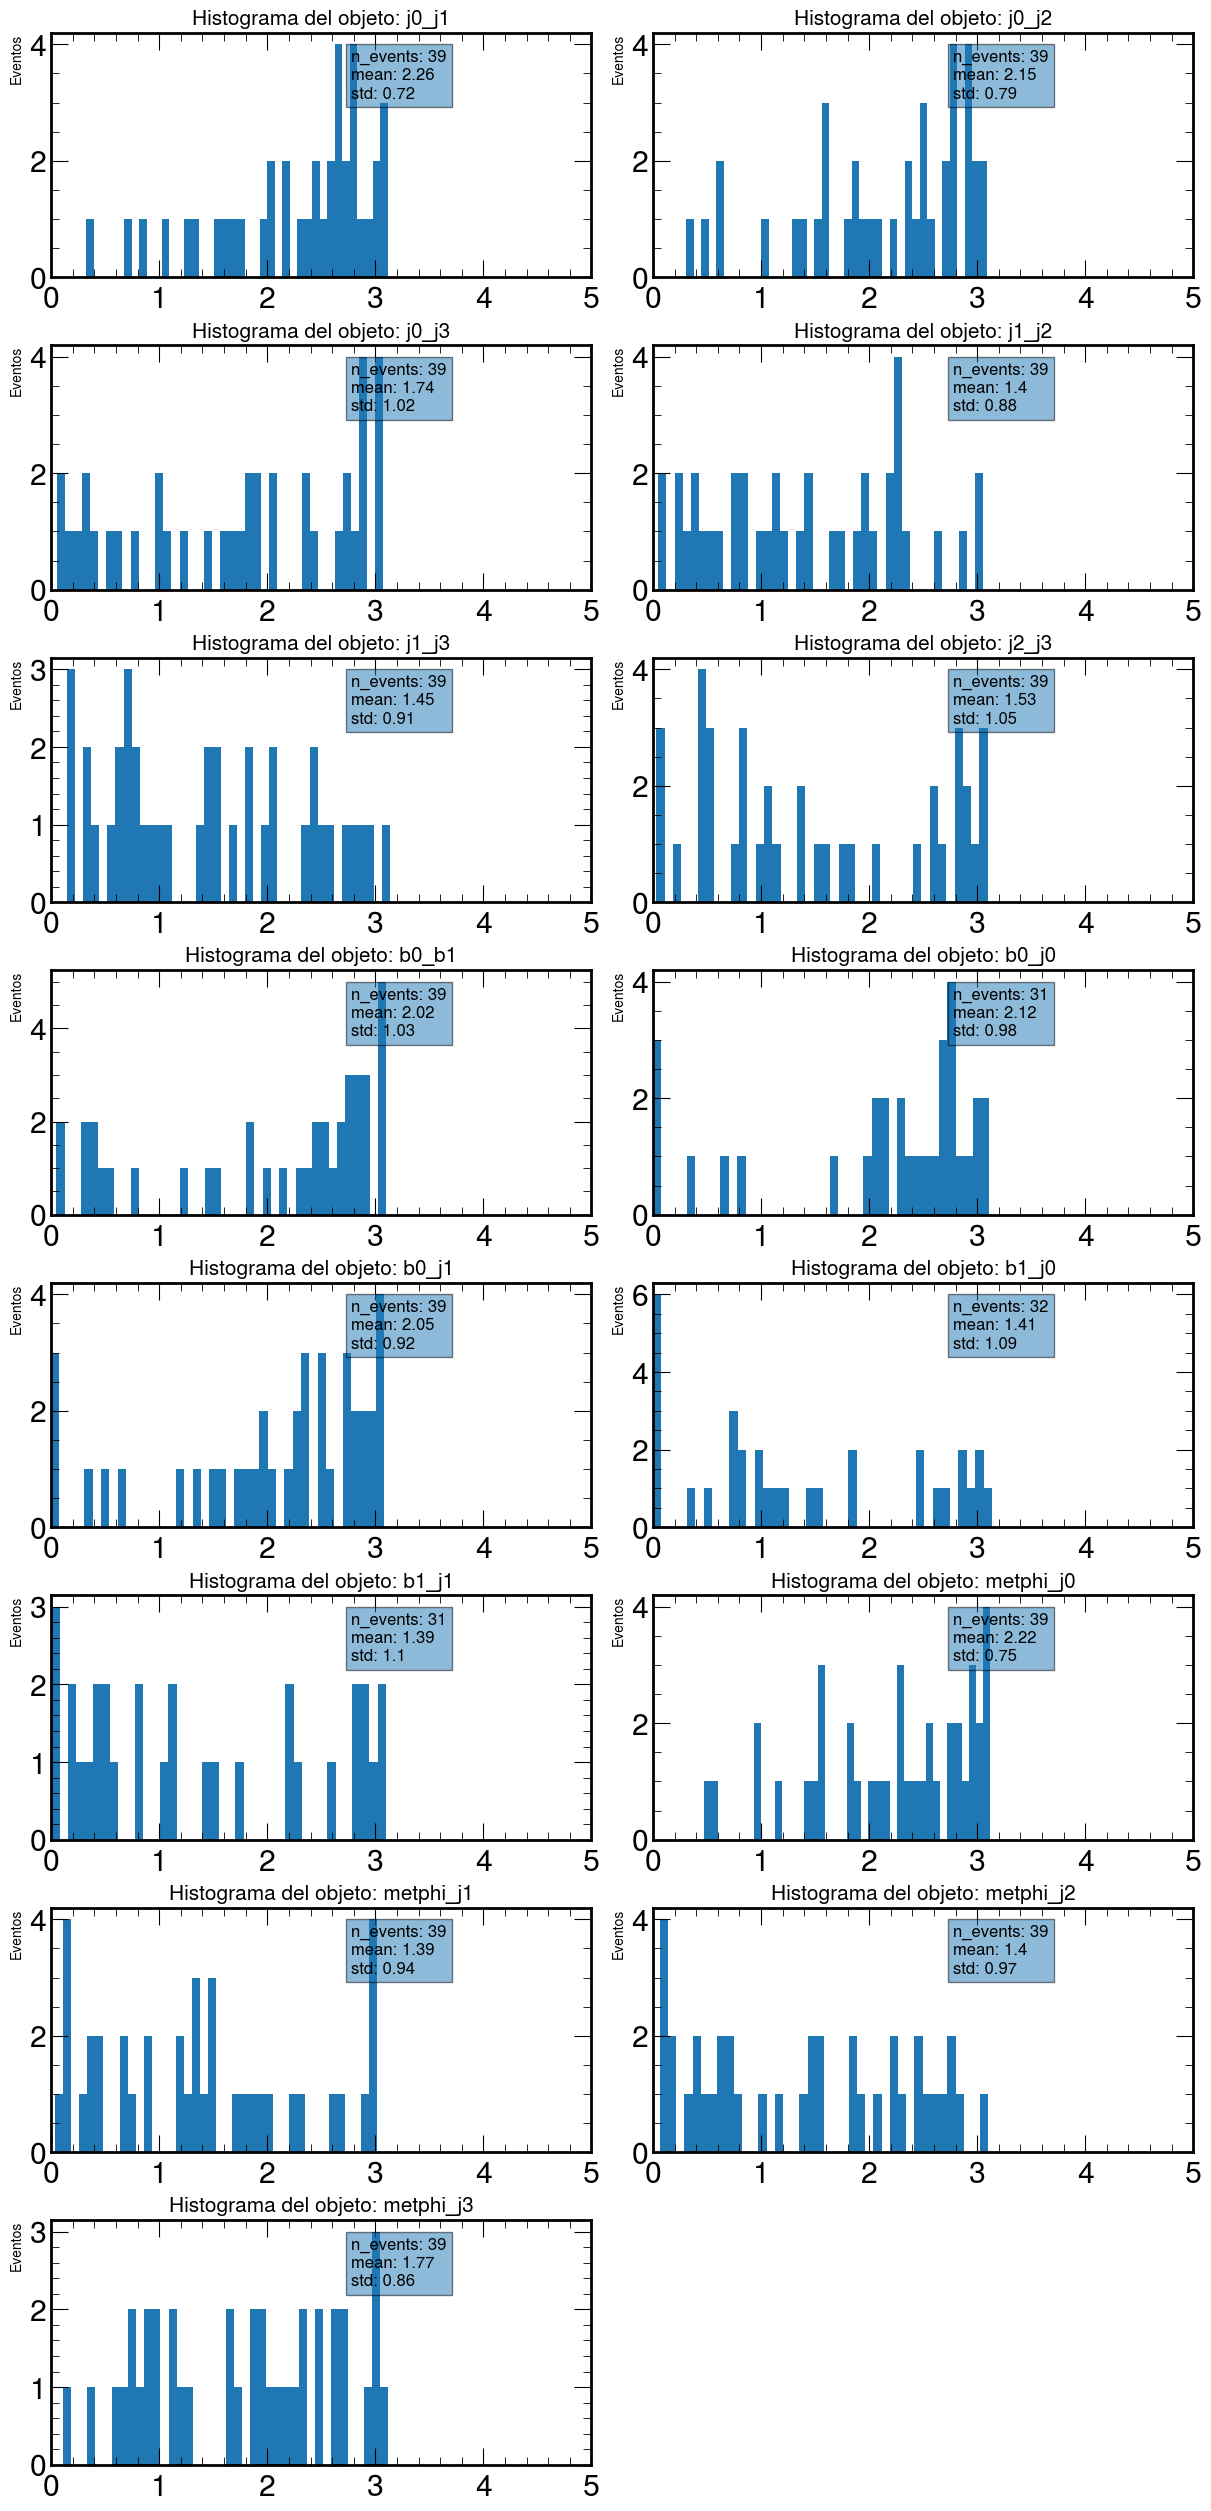

In [99]:
plt.figure(figsize=(12,25),constrained_layout=True)


plt.subplot(8,2,1)
pt_jet(df_Dphi,'j0_j1',0,5,40)
plt.subplot(8,2,2)
pt_jet(df_Dphi,'j0_j2',0,5,40)
plt.subplot(8,2,3)
pt_jet(df_Dphi,'j0_j3',0,5,40)
plt.subplot(8,2,4)
pt_jet(df_Dphi,'j1_j2',0,5,40)
plt.subplot(8,2,5)
pt_jet(df_Dphi,'j1_j3',0,5,40)
plt.subplot(8,2,6)
pt_jet(df_Dphi,'j2_j3',0,5,40)
plt.subplot(8,2,7)
pt_jet(df_Dphi,'b0_b1',0,5,40)
plt.subplot(8,2,8)
pt_jet(df_Dphi,'b0_j0',0,5,40)
plt.subplot(8,2,9)
pt_jet(df_Dphi,'b0_j1',0,5,40)
plt.subplot(8,2,10)
pt_jet(df_Dphi,'b1_j0',0,5,40)
plt.subplot(8,2,11)
pt_jet(df_Dphi,'b1_j1',0,5,40)
plt.subplot(8,2,12)
pt_jet(df_Dphi,'metphi_j0',0,5,40)
plt.subplot(8,2,13)
pt_jet(df_Dphi,'metphi_j1',0,5,40)
plt.subplot(8,2,14)
pt_jet(df_Dphi,'metphi_j2',0,5,40)
plt.subplot(8,2,15)
pt_jet(df_Dphi,'metphi_j3',0,5,40)

In [100]:
data_final = pd.concat([data_after_c3, df_Dphi],axis=1)
data_final.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,...,j2_j3,b0_b1,b0_j0,b0_j1,b1_j0,b1_j1,metphi_j0,metphi_j1,metphi_j2,metphi_j3
0,30.005571,20.485077,0.928941,0.918558,-2.261893,1.720905,3.933682,3.084310e+00,-0.010383,2.300388,...,0.083292,2.300388,2.300388e+00,1.810909,2.220446e-16,2.171888,2.466141,1.516657,0.655231,0.571940
1,17.729637,7.257498,-0.925203,0.432409,-1.539267,2.939303,2.795684,1.385283e+00,1.357612,1.804615,...,0.209569,1.804615,2.663991e+00,1.595046,8.593757e-01,0.209569,1.584369,2.034825,3.103770,2.894201
2,30.244276,9.458129,-1.200021,-0.133959,-1.863235,1.541678,4.370663,1.774305e+00,1.066062,2.878272,...,1.546958,2.878272,2.144061e+00,1.331315,7.342116e-01,1.546958,2.759328,1.379797,2.192543,0.645585
3,28.323366,11.020461,1.445357,1.898158,-1.698247,0.956594,5.804322,2.328938e+00,0.452801,2.654840,...,0.030427,2.654840,2.654840e+00,3.011186,1.110223e-16,0.356346,2.278026,1.350319,0.993973,0.963546
4,7.196779,6.347936,1.466929,0.993870,-1.720205,-2.494814,1.145968,1.685874e-07,-0.473060,0.774609,...,3.051106,0.774609,2.220446e-16,2.276497,7.746090e-01,3.051106,3.037646,1.708662,0.567835,2.483271


In [101]:
data_final.to_csv("data_final_signal.csv",index=None)

# Estadisticas descriptivas de tabla de valores de $\Delta \phi$

In [102]:
df_Dphi.describe()

,j0_j1,j0_j2,j0_j3,j1_j2,j1_j3,j2_j3,b0_b1,b0_j0,b0_j1,b1_j0,b1_j1,metphi_j0,metphi_j1,metphi_j2,metphi_j3
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.100000e+01,3.900000e+01,3.200000e+01,3.100000e+01,39.000000,39.000000,39.000000,39.000000
mean,2.261074,2.145642,1.735952,1.404208,1.449365,1.529038,2.022041,2.120031e+00,2.052540e+00,1.408020e+00,1.394150e+00,2.224034,1.386752,1.402163,1.772379
std,0.723279,0.790284,1.019867,0.883123,0.907745,1.049779,1.027387,9.787145e-01,9.246864e-01,1.090074e+00,1.099400e+00,0.750214,0.939176,0.974089,0.859635
min,0.326468,0.306888,0.055247,0.049287,0.145665,0.030427,0.049287,5.551115e-17,5.551115e-17,2.775558e-17,5.551115e-17,0.467396,0.036631,0.062858,0.108347
25%,1.858558,1.619615,0.880905,0.663569,0.728860,0.529993,1.315418,2.013267e+00,1.682398e+00,6.831689e-01,4.391698e-01,1.697789,0.556846,0.526956,0.963438
50%,2.549235,2.383825,1.831063,1.354557,1.421807,1.341090,2.482727,2.482727e+00,2.324986e+00,1.097500e+00,1.109533e+00,2.354719,1.322134,1.478435,1.904487
75%,2.780746,2.783584,2.765329,2.197841,2.223010,2.638889,2.824598,2.783995e+00,2.783584e+00,2.510975e+00,2.439918e+00,2.879018,1.998042,2.268841,2.493306
max,3.113420,3.095280,3.075009,3.053869,3.139880,3.097606,3.100782,3.113420e+00,3.081305e+00,3.139880e+00,3.097606e+00,3.121989,3.018340,3.103770,3.119181
